In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from figure_formatting import figure_formatting as ff
ff.formatting['axes.linewidth'] = 0.5
ff.formatting['lines.linewidth'] = 1.0
ff.set_formatting()
ff.set_formatting()

from scipy.stats import linregress
from scipy.optimize import curve_fit

from dataclasses import dataclass
from sklearn.metrics import r2_score

@dataclass
class RegressionParams:
    slope: float
    intercept: float
    slope_sd: float
    intercept_sd: float
    r2: float

In [2]:
colors = {'blue': '#264653',
          'green': '#2A9D8F',
          'yellow': '#E9C46A',
          'light orange': '#F4A261',
          'dark orange': '#E76F51'}

In [3]:
column_names = ('F', 'd_iso', 's_iso', 'd_csa', 's_csa', 'type')
data = pd.read_csv('../Data/TiF4_NMR_data.csv', 
                    skiprows=1,
                    delim_whitespace=True,
                    names=column_names)

In [4]:
data

,F,d_iso,s_iso,d_csa,s_csa,type
0,5,-2.0,55.197775,-146.66667,203.9739,bridging
1,12,1.7,51.986050,-138.26667,210.7944,bridging
2,9,7.6,43.660300,-146.46667,213.7668,bridging
3,2,25.4,21.934950,-171.33333,260.5653,bridging
4,6,29.4,17.810575,-179.46667,264.2165,bridging
5,1,30.0,17.621550,-171.00000,264.6422,bridging
6,7,422.5,-320.132925,-562.33333,606.7589,terminal
7,11,424.2,-320.367475,-554.06667,611.7644,terminal
8,3,426.5,-322.488175,-545.86667,613.3090,terminal
9,10,447.7,-341.310150,-594.53333,638.9894,terminal


In [5]:
def line(x, m, c):
    return m*x + c

In [6]:
def fit_linear_model(x: np.ndarray,
                     y: np.ndarray,
                     fit_intercept: bool):
    if fit_intercept:
        model = lambda x, m, c: x*m + c
        popt, pcov = curve_fit(model, x, y)
        r2 = r2_score(y, line(x, popt[0], popt[1]))
        reg = RegressionParams(popt[0], popt[1], np.sqrt(pcov[0][0]), np.sqrt(pcov[1][1]), r2)
    else:
        model = lambda x, m: x*m
        popt, pcov = curve_fit(model, x, y)
        r2 = r2_score(y, line(x, popt[0], 0))
        reg = RegressionParams(popt[0], 0.0, np.sqrt(pcov[0][0]), 0.0, r2)
    return reg

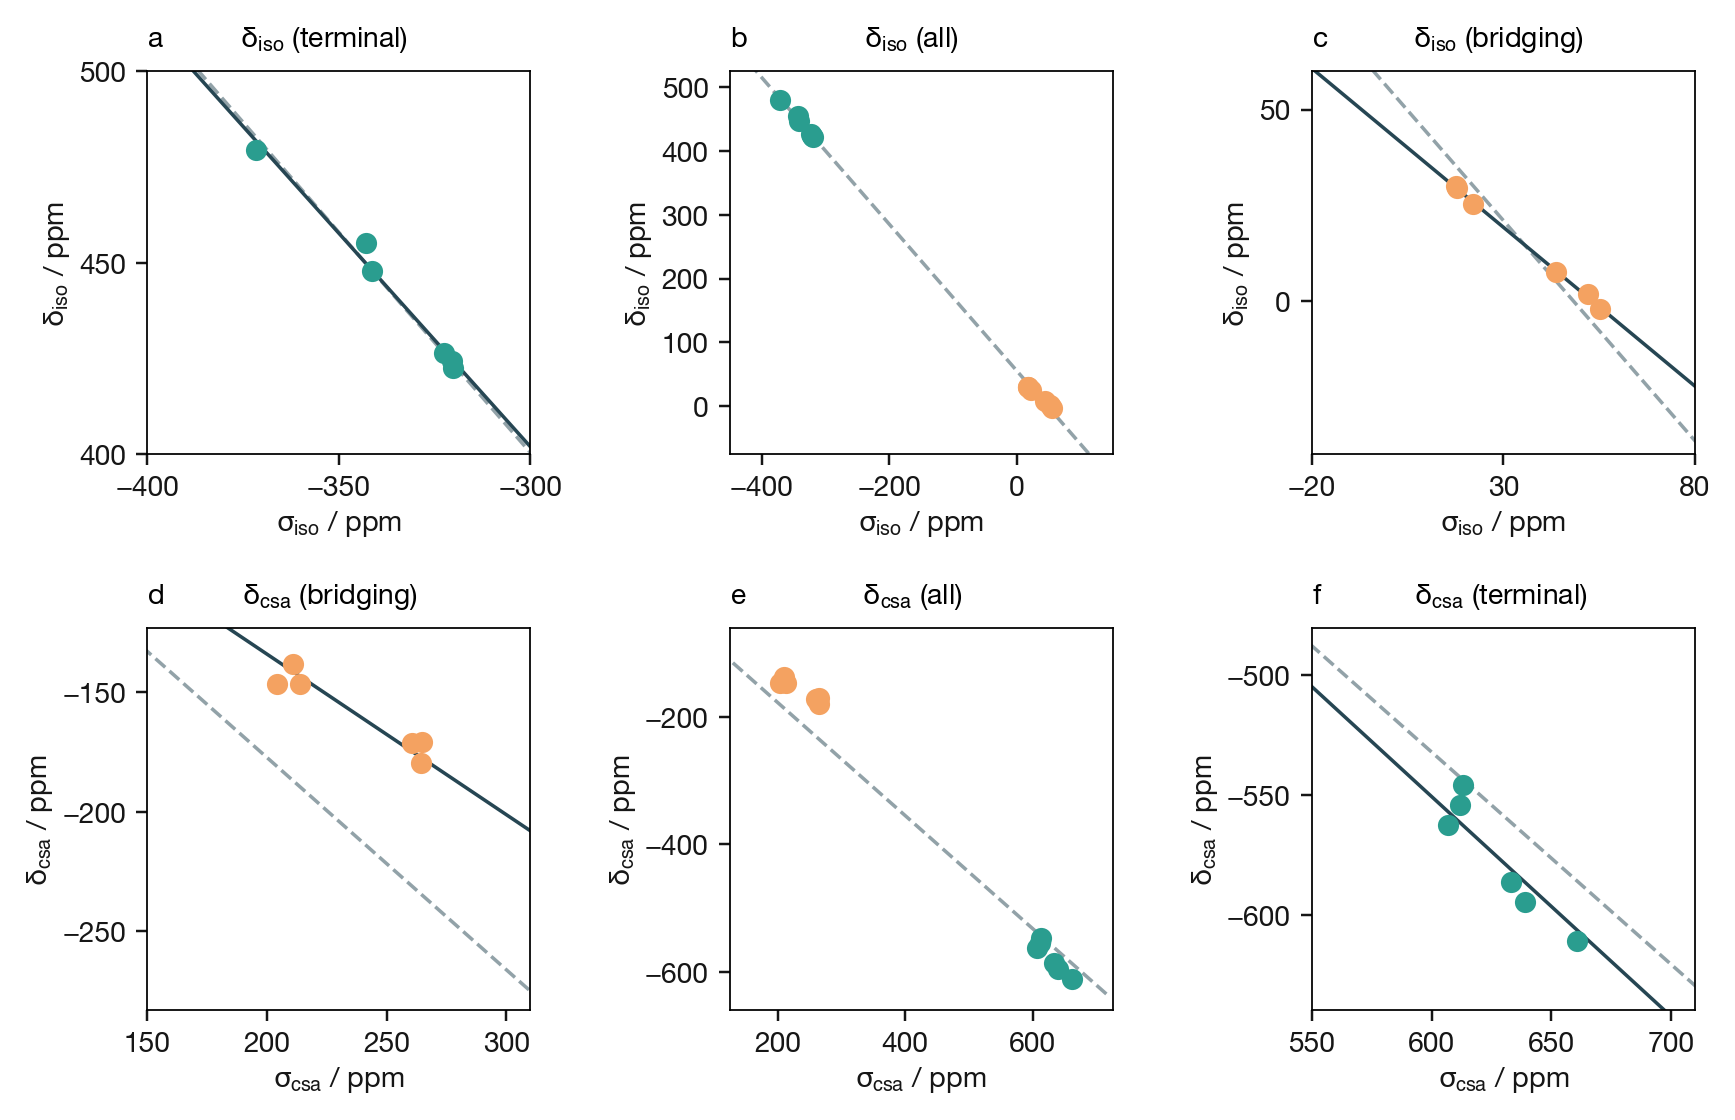

In [7]:
s_iso_range = np.linspace(-420, 120)
s_csa_range = np.linspace(130, 720)

ms = 6

fig, ((ax3, ax1, ax5), (ax6, ax2, ax4)) = plt.subplots(2, 3, figsize=(7,4.5))

reg_iso = fit_linear_model(data.s_iso, data.d_iso, fit_intercept=True)
reg_csa = fit_linear_model(data.s_csa, data.d_csa, fit_intercept=False)

b_data = data[data.type == 'bridging']
t_data = data[data.type == 'terminal']

b_reg_iso = fit_linear_model(b_data.s_iso, b_data.d_iso, fit_intercept=True)
t_reg_iso = fit_linear_model(t_data.s_iso, t_data.d_iso, fit_intercept=True)
b_reg_csa = fit_linear_model(b_data.s_csa, b_data.d_csa, fit_intercept=False)
t_reg_csa = fit_linear_model(t_data.s_csa, t_data.d_csa, fit_intercept=False)

ax1_size = 600
x_min = -450
y_min = -75
ax1.plot(s_iso_range, line(s_iso_range, reg_iso.slope, reg_iso.intercept), '--', color=colors['blue'], alpha=0.5)
ax1.plot(b_data.s_iso, b_data.d_iso, 'o', color=colors['light orange'], markersize=ms, markeredgewidth=0.0)
ax1.plot(t_data.s_iso, t_data.d_iso, 'o', color=colors['green'], markersize=ms, markeredgewidth=0.0)
ax1.set_xlabel('$\sigma_\mathrm{iso}$ / ppm')
ax1.set_ylabel('$\delta_\mathrm{iso}$ / ppm')
ax1.set_box_aspect(1)
ax1.set_title(r'b               $\delta_\mathrm{iso}$ (all)')
ax1.set_xticks(np.arange(-400, 200, step=200))
ax1.set_xlim(x_min, x_min + ax1_size)
ax1.set_ylim(y_min, y_min + ax1_size)

# ax1.set_yticks(np.arange(-100, 600, step=200))

ax2_size = 600
x_min = 125
y_min = -660
ax2.plot(s_csa_range, line(s_csa_range, reg_csa.slope, reg_csa.intercept), '--', color=colors['blue'], alpha=0.5)
ax2.plot(b_data.s_csa, b_data.d_csa, 'o', color=colors['light orange'], markersize=ms, markeredgewidth=0.0)
ax2.plot(t_data.s_csa, t_data.d_csa, 'o', color=colors['green'], markersize=ms, markeredgewidth=0.0)
ax2.set_xlabel('$\sigma_\mathrm{csa}$ / ppm')
ax2.set_ylabel('$\delta_\mathrm{csa}$ / ppm')
ax2.set_box_aspect(1)
ax2.set_title('e               $\delta_\mathrm{csa}$ (all)')
ax2.set_yticks(np.arange(-600, -90, step=200))
ax2.set_ylim(-650, -50)
ax2.set_xlim(x_min, x_min + ax2_size)
ax2.set_ylim(y_min, y_min + ax2_size)
# ax2.set_xticks(np.arange(100, 710, step=100))


ax3.plot(s_iso_range, line(s_iso_range, reg_iso.slope, reg_iso.intercept), '--', color=colors['blue'], alpha=0.5)
ax3.plot(s_iso_range, line(s_iso_range, t_reg_iso.slope, t_reg_iso.intercept), color=colors['blue'])
ax3.plot(t_data.s_iso, t_data.d_iso, 'o', color=colors['green'], markersize=ms, markeredgewidth=0.0)
ax3.set_xlabel('$\sigma_\mathrm{iso}$ / ppm')
ax3.set_ylabel('$\delta_\mathrm{iso}$ / ppm')
ax3.set_xticks(np.arange(-400, -299, step=50))
ax3.set_yticks(np.arange(400, 550, step=50))
ax3.set_xlim(-400, -300)
ax3.set_ylim(400, 500)
ax3.set_box_aspect(1)
ax3.set_title('a          $\delta_\mathrm{iso}$ (terminal)')


ax5.plot(s_iso_range, line(s_iso_range, reg_iso.slope, reg_iso.intercept), '--', color=colors['blue'], alpha=0.5)
ax5.plot(s_iso_range, line(s_iso_range, b_reg_iso.slope, b_reg_iso.intercept), color=colors['blue'])
ax5.plot(b_data.s_iso, b_data.d_iso, 'o', color=colors['light orange'], markersize=ms, markeredgewidth=0.0)
ax5.set_xlabel('$\sigma_\mathrm{iso}$ / ppm')
ax5.set_ylabel('$\delta_\mathrm{iso}$ / ppm')
ax5.set_xticks(np.arange(-20, 90, step=50))
ax5.set_yticks(np.arange(-50, 100, step=50))
ax5.set_xlim(-20, 80)
ax5.set_ylim(-40, 60)
ax5.set_box_aspect(1)
ax5.set_title('c           $\delta_\mathrm{iso}$ (bridging)')

ax4.plot(s_csa_range, line(s_csa_range, reg_csa.slope, reg_csa.intercept), '--', color=colors['blue'], alpha=0.5)
ax4.plot(s_csa_range, line(s_csa_range, t_reg_csa.slope, t_reg_csa.intercept), color=colors['blue'])
ax4.plot(t_data.s_csa, t_data.d_csa, 'o', color=colors['green'], markersize=ms, markeredgewidth=0.0)
ax4.set_xlabel('$\sigma_\mathrm{csa}$ / ppm')
ax4.set_ylabel('$\delta_\mathrm{csa}$ / ppm')
ax4.set_xticks(np.arange(500, 750, step=50))
ax4.set_xlim(550, 710)
ax4.set_ylim(-640, -480)
ax4.set_box_aspect(1)
ax4.set_title('f            $\delta_\mathrm{csa}$ (terminal)')


ax6.plot(s_csa_range, line(s_csa_range, reg_csa.slope, reg_csa.intercept), '--', color=colors['blue'], alpha=0.5)
ax6.plot(s_csa_range, line(s_csa_range, b_reg_csa.slope, b_reg_csa.intercept), color=colors['blue'])
ax6.plot(b_data.s_csa, b_data.d_csa, 'o', color=colors['light orange'], markersize=ms, markeredgewidth=0.0)
ax6.set_xlabel('$\sigma_\mathrm{csa}$ / ppm')
ax6.set_ylabel('$\delta_\mathrm{csa}$ / ppm')
ax6.set_xticks(np.arange(150, 350, step=50))
ax6.set_xlim(150, 310)
ax6.set_ylim(-283, -123)
ax6.set_box_aspect(1)
ax6.set_title('d          $\delta_\mathrm{csa}$ (bridging)')


fig.tight_layout()

plt.savefig('../Figures/TiF4_fitting_2_column.pdf')
plt.show()


In [8]:
def model_params(reg):
    print(f'y = ({reg.slope:.3f}±{reg.slope_sd:.3f})x + ({reg.intercept:.1f}±{reg.intercept_sd:.1f}). R2 = {reg.r2:.4f}')

In [9]:
print('d_iso (all)')
model_params(reg_iso)

print('\nd_iso (terminal)')
model_params(t_reg_iso)

print('\nd_iso (bridging)')
model_params(b_reg_iso)

d_iso (all)
y = (-1.150±0.007)x + (55.5±1.7). R2 = 0.9996

d_iso (terminal)
y = (-1.115±0.070)x + (67.5±23.7). R2 = 0.9843

d_iso (bridging)
y = (-0.830±0.014)x + (44.1±0.5). R2 = 0.9988


In [10]:
print('d_csa (all)')
model_params(reg_csa)

print('\nd_csa (terminal)')
model_params(t_reg_csa)

print('\nd_csa (bridging)')
model_params(b_reg_csa)

d_csa (all)
y = (-0.887±0.025)x + (0.0±0.0). R2 = 0.9643

d_csa (terminal)
y = (-0.918±0.006)x + (0.0±0.0). R2 = 0.8500

d_csa (bridging)
y = (-0.671±0.010)x + (0.0±0.0). R2 = 0.8793
